<a href="https://colab.research.google.com/github/SeungPang11/Fake-News-Detection-with-Maching-Learning/blob/main/Updated_Dec_2023_Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Fake News Detection (Updated Dec 2023)**
* **Objective**: Using datasets from a previous research, improve performance to achieve <br>
more efficient and reliable models for predicting fradulant information. <br>

* **Dataset**: [FakeNewsNet](https://github.com/KaiDMML/FakeNewsNet)<br>
  -Fake and real news from two news platforms, **Gossip Cop** and **Politifact**
<br> -**Attributes** include: id, news_url, title, and tweet_ids

 -Gossip Cop fake news - 5323 rows, 4 columns <br>
 -Gossip Cop real news - 16817 rows, 4 columns

 -Politifact fake news - 432 rows, 4 columns <br>
 -Politifact real news - 624 rows, 4 columns

 -Total fake news - 5755 <br>
 -Total real news - 17441


* **Problem**: imbalanced dataset; the total # real news **three times more** than the total # fake news <br>

*  **Process**: <br>
  -Exploratory Data Analysis (EDA) <br>
  -Text Pre-processing <br>
  -Feature Engineering <br>
  -Model Performance BEFORE Imbalanced Data Handling <br>
  -Model Performance AFTER Imbalanced Data Handling <br>

* **Models**: Naive Bayes, Logistic Regression, SVM, XGBoost

In [175]:
# Necessary Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from xgboost import XGBClassifier

In [176]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [91]:
#GossipCop Fake News and Real News
gossip_fn = pd.read_csv("/content/drive/MyDrive/gossipcop_fake.csv")
gossip_tn = pd.read_csv("/content/drive/MyDrive/gossipcop_real.csv")

In [92]:
gossip_fn.head(5)

,id,news_url,title,tweet_ids
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...
3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...
4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...


In [93]:
gossip_tn.head(5)

,id,news_url,title,tweet_ids
0,gossipcop-882573,https://www.brides.com/story/teen-mom-jenelle-...,Teen Mom Star Jenelle Evans' Wedding Dress Is ...,912371411146149888\t912371528343408641\t912372...
1,gossipcop-875924,https://www.dailymail.co.uk/tvshowbiz/article-...,Kylie Jenner refusing to discuss Tyga on Life ...,901989917546426369\t901989992074969089\t901990...
2,gossipcop-894416,https://en.wikipedia.org/wiki/Quinn_Perkins,Quinn Perkins,931263637246881792\t931265332022579201\t931265...
3,gossipcop-857248,https://www.refinery29.com/en-us/2018/03/19192...,I Tried Kim Kardashian's Butt Workout & Am For...,868114761723936769\t868122567910936576\t868128...
4,gossipcop-884684,https://www.cnn.com/2017/10/04/entertainment/c...,Celine Dion donates concert proceeds to Vegas ...,915528047004209152\t915529285171122176\t915530...


In [94]:
gossip_fn.shape

(5323, 4)

In [95]:
gossip_tn.shape

(16817, 4)

In [96]:
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
stop_words = stopwords.words()

def cleaning(text):
    # converting to lowercase
    text = text.lower()

    # removing URL links
    text = re.sub('https?://\S+|www\.\S+', '', text)

    # removing special characters, punctuations...
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    # removing the emojies https://www.kaggle.com/alankritamishra/covid-19-tweet-sentiment-analysis#Sentiment-analysis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # removing the stop-words
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stop_words]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence

    return text

dt = gossip_tn['title'].apply(cleaning)

In [98]:
#Gossip Cop Real News Analysis
from collections import Counter
GC_RN = Counter(" ".join(dt).split()).most_common(10)
GC_RN_Result = pd.DataFrame(GC_RN, columns=['Word', 'Frequency'])
print(GC_RN_Result)

         Word  Frequency
0        2018        697
1      season        620
2  kardashian        600
3      awards        597
4        star        501
5     wedding        492
6        baby        462
7     reveals        413
8      prince        388
9       watch        376


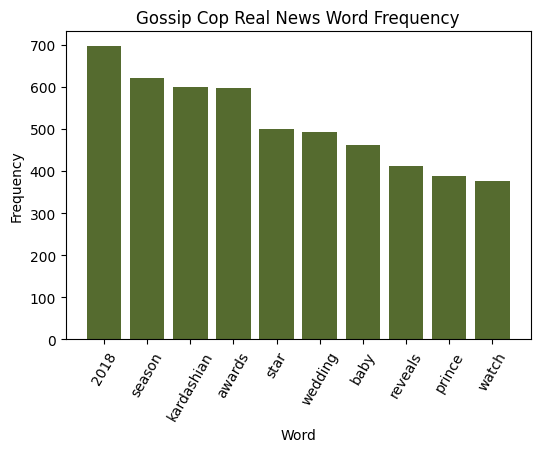

In [99]:
#Gossip Cop Real News - Most Common Words
plt.figure(figsize=(6,4))
X = GC_RN_Result['Word']
y = GC_RN_Result['Frequency']
plt.bar(X, y, linewidth=2.0, color='darkolivegreen')

plt.title("Gossip Cop Real News Word Frequency")
plt.xlabel("Word")
plt.xticks(rotation=60)
plt.ylabel("Frequency")
plt.show()

In [100]:
#Gossip Cop Fake News Analysis
GC_FN_Clean = gossip_fn['title'].apply(cleaning)

In [101]:
GC_FN = Counter(" ".join(GC_FN_Clean).split()).most_common(10)
GC_FN_Result = pd.DataFrame(GC_FN, columns=['Word', 'Frequency'])

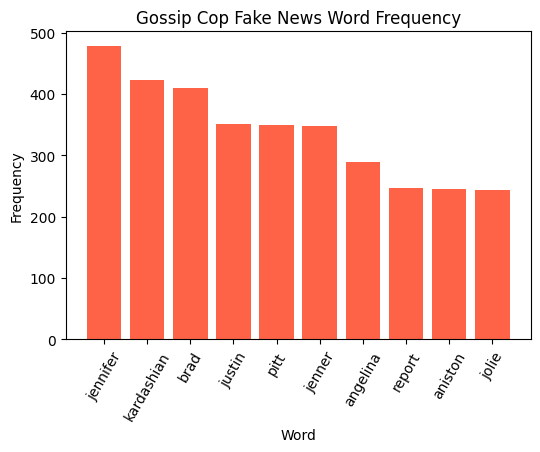

In [102]:
#Gossip Cop Fake News - Most Common Words
plt.figure(figsize=(6,4))
X = GC_FN_Result['Word']
y = GC_FN_Result['Frequency']
plt.bar(X, y, linewidth=2.0, color='tomato')

plt.title("Gossip Cop Fake News Word Frequency")
plt.xlabel("Word")
plt.xticks(rotation=60)
plt.ylabel("Frequency")
plt.show()

In [103]:
#Load Politifact Fake and Real News
politi_fn = pd.read_csv("/content/drive/MyDrive/politifact_fake.csv")
politi_tn = pd.read_csv("/content/drive/MyDrive/politifact_real.csv")

In [104]:
politi_fn.head(5)

,id,news_url,title,tweet_ids
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,937349434668498944\t937379378006282240\t937380...
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,972666281441878016\t972678396575559680\t972827...
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,929405740732870656\t929439450400264192\t929439...
3,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,886941526458347521\t887011300278194176\t887023...
4,politifact15371,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,915205698212040704\t915242076681506816\t915249...


In [105]:
politi_tn.head(5)

,id,news_url,title,tweet_ids
0,politifact14984,http://www.nfib-sbet.org/,National Federation of Independent Business,967132259869487105\t967164368768196609\t967215...
1,politifact12944,http://www.cq.com/doc/newsmakertranscripts-494...,comments in Fayetteville NC,942953459\t8980098198\t16253717352\t1668513250...
2,politifact333,https://web.archive.org/web/20080204072132/htt...,"Romney makes pitch, hoping to close deal : Ele...",NaN
3,politifact4358,https://web.archive.org/web/20110811143753/htt...,Democratic Leaders Say House Democrats Are Uni...,NaN
4,politifact779,https://web.archive.org/web/20070820164107/htt...,"Budget of the United States Government, FY 2008",89804710374154240\t91270460595109888\t96039619...


In [106]:
politi_fn.shape

(432, 4)

In [107]:
politi_tn.shape

(624, 4)

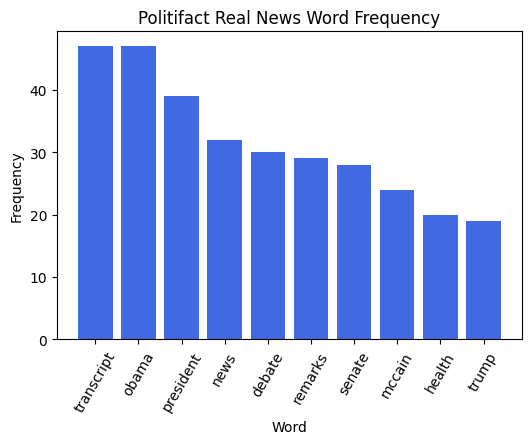

In [108]:
#Politifact Real News Analysis - Most Common Words
PF_RN_Clean = politi_tn['title'].apply(cleaning)
PF_RN = Counter(" ".join(PF_RN_Clean).split()).most_common(10)
PF_RN_Result = pd.DataFrame(PF_RN, columns=['Word', 'Frequency'])

plt.figure(figsize=(6,4))
X = PF_RN_Result['Word']
y = PF_RN_Result['Frequency']
plt.bar(X, y, linewidth=2.0, color='royalblue')

plt.title("Politifact Real News Word Frequency")
plt.xlabel("Word")
plt.xticks(rotation=60)
plt.ylabel("Frequency")
plt.show()

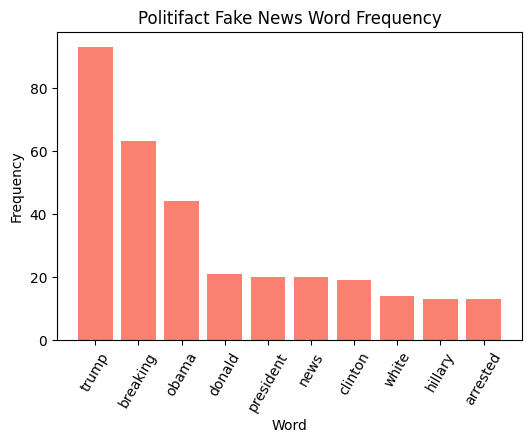

In [109]:
#Politifact Fake News Analysis - Most Common Words
PF_FN_Clean = politi_fn['title'].apply(cleaning)
PF_FN = Counter(" ".join(PF_FN_Clean).split()).most_common(10)
PF_FN_Result = pd.DataFrame(PF_FN, columns=['Word', 'Frequency'])

plt.figure(figsize=(6,4))
X = PF_FN_Result['Word']
y = PF_FN_Result['Frequency']
plt.bar(X, y, linewidth=2.0, color='salmon')

plt.title("Politifact Fake News Word Frequency")
plt.xlabel("Word")
plt.xticks(rotation=60)
plt.ylabel("Frequency")
plt.show()

In [110]:
#Check for Missing Values
#No missing values in title, text - the columns going to be used
gossip_fn.isnull().values.any()
gossip_fn.isnull().sum()

id             0
news_url     256
title          0
tweet_ids    188
dtype: int64

In [111]:
gossip_tn.isnull().sum()

id              0
news_url       13
title           0
tweet_ids    1058
dtype: int64

In [112]:
politi_fn.isnull().sum()

id            0
news_url      4
title         0
tweet_ids    40
dtype: int64

In [113]:
politi_tn.isnull().sum()

id             0
news_url      57
title          0
tweet_ids    215
dtype: int64

In [114]:
#Combine GossipCop and Politifact FAKE news
# id
# news_url
# title
# tweet_ids
fakenews = np.concatenate((politi_fn, gossip_fn))
fakenews.shape

(5755, 4)

In [115]:
#Combine GossipCop and Politifact REAL news
realnews = np.concatenate((politi_tn, gossip_tn))
realnews.shape

(17441, 4)

In [116]:
#Take only the columns needed - id, title

columns = ['id','news_url','title','tweet_ids']
fakenews = pd.DataFrame(fakenews, columns = columns)
fakenews = fakenews[['id','title']]
fakenews.head(5)

,id,title
0,politifact15014,BREAKING: First NFL Team Declares Bankruptcy O...
1,politifact15156,Court Orders Obama To Pay $400 Million In Rest...
2,politifact14745,UPDATE: Second Roy Moore Accuser Works For Mic...
3,politifact14355,Oscar Pistorius Attempts To Commit Suicide
4,politifact15371,Trump Votes For Death Penalty For Being Gay


In [117]:
# Add Flag - 1 indicate FAKE news
#fakenews.shape (5755, 2)
ones = np.ones(fakenews.shape[0])
fakenews = np.column_stack((fakenews, ones))
fakenews = pd.DataFrame(fakenews, columns = ['id','title','flag'])

In [118]:
fakenews.head(5)

,id,title,flag
0,politifact15014,BREAKING: First NFL Team Declares Bankruptcy O...,1.0
1,politifact15156,Court Orders Obama To Pay $400 Million In Rest...,1.0
2,politifact14745,UPDATE: Second Roy Moore Accuser Works For Mic...,1.0
3,politifact14355,Oscar Pistorius Attempts To Commit Suicide,1.0
4,politifact15371,Trump Votes For Death Penalty For Being Gay,1.0


In [119]:
realnews = pd.DataFrame(realnews, columns = columns)
realnews = realnews[['id','title']]
realnews.head(5)

,id,title
0,politifact14984,National Federation of Independent Business
1,politifact12944,comments in Fayetteville NC
2,politifact333,"Romney makes pitch, hoping to close deal : Ele..."
3,politifact4358,Democratic Leaders Say House Democrats Are Uni...
4,politifact779,"Budget of the United States Government, FY 2008"


In [120]:
# Add Flag - 0 indicate REAL news
zeros = np.zeros(realnews.shape[0])
realnews = np.column_stack((realnews, zeros))
realnews = pd.DataFrame(realnews, columns = ['id','title','flag'])

In [121]:
realnews.head(5)

,id,title,flag
0,politifact14984,National Federation of Independent Business,0.0
1,politifact12944,comments in Fayetteville NC,0.0
2,politifact333,"Romney makes pitch, hoping to close deal : Ele...",0.0
3,politifact4358,Democratic Leaders Say House Democrats Are Uni...,0.0
4,politifact779,"Budget of the United States Government, FY 2008",0.0


In [122]:
#Check Shape
fakenews.shape

(5755, 3)

In [123]:
realnews.shape

(17441, 3)

In [124]:
# Use for later - Undersampling
#split real news 3:2 (17441 rows total -> 11510 (2/3))
undersample_realnews = realnews.iloc[:11510,:]

In [125]:
# Combine fake and real news datasets -> allnews
allnews = np.concatenate((fakenews, realnews))

In [126]:
allnews.shape

(23196, 3)

In [127]:
# Assign columns
allnews = pd.DataFrame(allnews, columns = ['id','title','flag'])

In [128]:
# Shuffle data
from sklearn.utils import shuffle
allnews = shuffle(allnews)

In [129]:
allnews.head(5)

,id,title,flag
10360,gossipcop-953416,Downton Abbey (film),0.0
16132,gossipcop-900066,"Actors, directors tackle what Disney/Fox deal ...",0.0
12144,gossipcop-914133,McDonald's Is Testing Breakfast Happy Meals,0.0
20237,gossipcop-903315,See All the Photos of Pregnant Jinger Duggar's...,0.0
18843,gossipcop-938189,Suri Cruise Just Wore Summer’s New Floral Dres...,0.0


In [130]:
allnews.dtypes

id       object
title    object
flag     object
dtype: object

In [131]:
# More text data analysis

In [132]:
#The average count of words of tweet title
#On average, 68 words
allnews['word_count'] = allnews['title'].str.len()
allnews['word_count'].mean()

68.30332816002759

In [133]:
#Word count min - 10, max - 340
allnews['word_count'].min()
allnews['word_count'].max()

340

In [134]:
len(allnews['word_count'])

23196

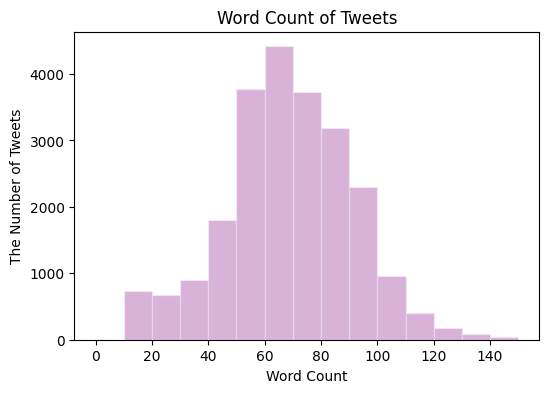

In [135]:
#Histogram shows the number of words in tweet
#Most tweets have word count that fall between 50-90

plt.figure(figsize=(6,4))
plt.hist(allnews['word_count'], bins=15, range=[0, 150], alpha=0.30, edgecolor="white", color='purple')
plt.title("Word Count of Tweets")
plt.xlabel("Word Count")
plt.ylabel("The Number of Tweets")
plt.show()

## Feature Engineering
Transform texts into numeric representation in order to make data usable for ML models <br>

-**TD-IDF** (Term Frequency-Inverse Document Frequency) = **TF x IDF** <br>
**TF (Term Frequency)**:
(# times term t appears in a document) / (Total # of terms in the document) <br>
**IDF (Inverse Document Frequency)**:
Log_10 (Total # of documents) / (# of documents with term t in it)



In [136]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [137]:
# TF-IDF Vectorizer
# Transform texts (news titles) into a meaningful representation of numbers while removing stopwords
#tf_idf = TfidfVectorizer(analyzer='word')

tf_idf = TfidfVectorizer(analyzer='word', stop_words='english', strip_accents = "ascii")
X = tf_idf.fit_transform(allnews['title'])
y = allnews['flag'].astype('int')

#Transform to arrays
np.asarray(X)
np.asarray(y)

#70:30 Train and Test Split
Xtr, Xts, ytr, yts = train_test_split(X, y, random_state = 0, test_size = 0.3)

In [138]:
# features = tf_idf.get_feature_names()
# news_matrix_df = pd.DataFrame(allnews, columns=tf_idf.get_feature_names(), index=allnews['title'])
# news_matrix_df.head(10)

## Model Performance **BEFORE** Imbalanced Data Handling
* Multinomial Naive Bayes
* Bernoulli Naive Bayes
* Logistic Regression
* XGBoost

In [139]:
#1) Multinomial Naive Bayes
MNB = MultinomialNB()
classifier = MNB.fit(Xtr,ytr)

In [140]:
#Evaluate on TRAIN dataset - TRAIN ACCURACY 0.85
train_yhat = classifier.predict(Xtr)
train_acc = accuracy_score(ytr, train_yhat)
train_acc

0.8499722855207242

In [141]:
#Evaluate on TEST dataset - TEST ACCURACY 0.82
test_yhat = classifier.predict(Xts)
test_acc = accuracy_score(yts, test_yhat)
test_acc

0.8110360684006322

In [142]:
yhat = MNB.predict(Xts)

In [143]:
#0- real news, 1- fake news
class_names = ['Real','Fake']

MNB Confusion matrix, without normalization
[[5134  104]
 [1211  510]]
MNB Normalized confusion matrix
[[0.98014509 0.01985491]
 [0.70366066 0.29633934]]


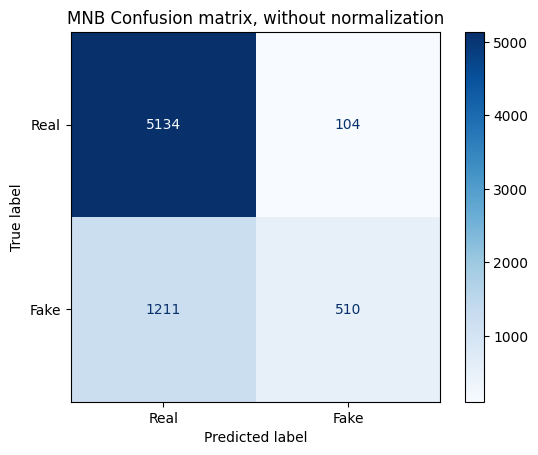

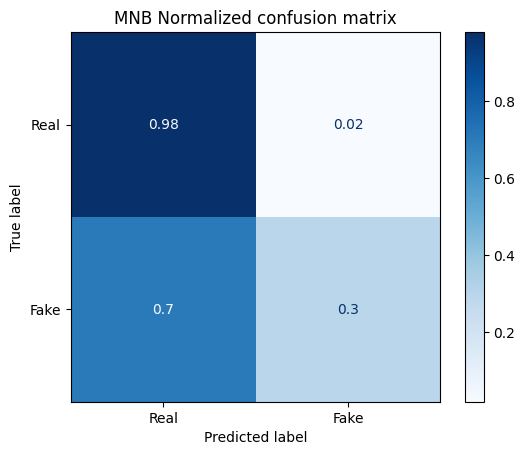

In [144]:
# Plot non-normalized confusion matrix
titles_options = [
    ("MNB Confusion matrix, without normalization", None),
    ("MNB Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        Xts,
        yts,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [145]:
#MNB Performance
print("Cross Val: ", cross_val_score(MNB, X, y, cv=10))
print("Accuracy: ",metrics.accuracy_score(yts, yhat))
print("Precision: ", metrics.precision_score(yts, yhat))
print("Recall: ", metrics.recall_score(yts, yhat))
print("F1: ", metrics.f1_score(yts, yhat))
print("ROC-AUC: ", metrics.roc_auc_score(yts, yhat))

Cross Val:  [0.82068966 0.825      0.82844828 0.82543103 0.81810345 0.8237069
 0.82535576 0.81285037 0.82319966 0.82147477]
Accuracy:  0.8110360684006322
Precision:  0.8306188925081434
Recall:  0.2963393375944218
F1:  0.43683083511777304
ROC-AUC:  0.6382422155707886


In [146]:
#2) Bernoulli Naive Bayes
BNB = BernoulliNB()
BNB.fit(Xtr,ytr)
yhat= BNB.predict(Xts)

BNB Confusion matrix, without normalization
[[5134  104]
 [1211  510]]
BNB Normalized confusion matrix
[[0.98014509 0.01985491]
 [0.70366066 0.29633934]]


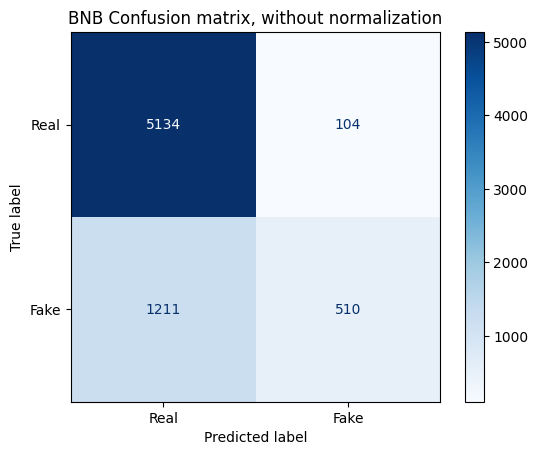

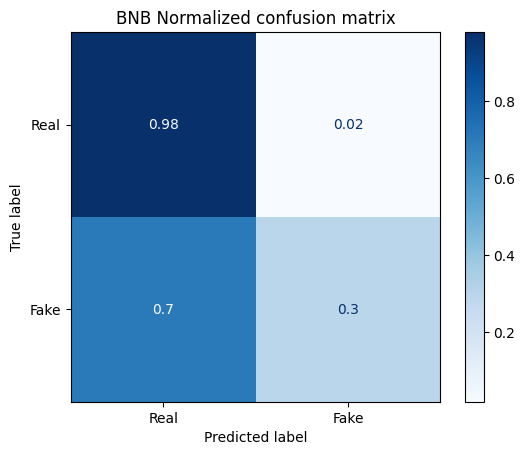

In [147]:
# Plot non-normalized confusion matrix
titles_options = [
    ("BNB Confusion matrix, without normalization", None),
    ("BNB Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        Xts,
        yts,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [148]:
#BNB Performance
print("Cross Val : ", cross_val_score(BNB, X, y, cv=10))
print("Accuracy: ",metrics.accuracy_score(yts, yhat))
print("Precision: ", metrics.precision_score(yts, yhat))
print("Recall: ", metrics.recall_score(yts, yhat))
print("F1: ", metrics.f1_score(yts, yhat))
print("ROC-AUC: ", metrics.roc_auc_score(yts, yhat))

Cross Val :  [0.8387931  0.83232759 0.83103448 0.83663793 0.83275862 0.82672414
 0.82880552 0.82147477 0.83139284 0.83699871]
Accuracy:  0.8233941658284236
Precision:  0.6824925816023739
Recall:  0.5345729227193492
F1:  0.599543825350277
ROC-AUC:  0.7264311730817059


In [149]:
#Logistic Regression BEFORE SMOTE
LR_Model = LogisticRegression()
LR_Model.fit(Xtr, ytr)
yhat = LR_Model.predict(Xts)

#Logit Performance
# print("Cross Val : ", cross_val_score(BNB, X, y, cv=10))
print("Accuracy: ",metrics.accuracy_score(yts, yhat))
print("Precision: ", metrics.precision_score(yts, yhat))
print("Recall: ", metrics.recall_score(yts, yhat))
print("F1: ", metrics.f1_score(yts, yhat))
print("ROC-AUC: ", metrics.roc_auc_score(yts, yhat))

Accuracy:  0.8288547205058198
Precision:  0.7924944812362031
Recall:  0.4171993027309704
F1:  0.5466311381804341
ROC-AUC:  0.6906538705331065


In [150]:
#XGBoost BEFORE SMOTE
xgb = XGBClassifier()
model = xgb.fit(Xtr, ytr)
yhat = xgb.predict(Xts)

#XGBoost Performance
#print("Cross Val : ", cross_val_score(BNB, X, y, cv=10))
print("Accuracy: ",metrics.accuracy_score(yts, yhat))
print("Precision: ", metrics.precision_score(yts, yhat))
print("Recall: ", metrics.recall_score(yts, yhat))
print("F1: ", metrics.f1_score(yts, yhat))
print("ROC-AUC: ", metrics.roc_auc_score(yts, yhat))

Accuracy:  0.8219571777554247
Precision:  0.7642543859649122
Recall:  0.40499709471237655
F1:  0.5294341055829852
ROC-AUC:  0.6819754469361805


## Analysis - Before Imbalanced Data Handling
All models (Naive Bayes, Logistic Regression, XGBoost) <br>
• **HIGH** Accuracy and Precision, but **LOW** Recall <br>
• **HIGH** Accuracy, but **LOW** ROC-AUC <br>
• Good at capturing REAL news, but **poorly detects FAKE news** <br>

• Imbalanced dataset (REAL news more than 3 times greater than FAKE news) <br>
-> Model tilted towards predicting the majority class

## Apply SMOTE (Synthetic Minority Over Sampling)
• Over sample minority class (FAKE news)

In [151]:
#https://towardsdatascience.com/applying-smote-for-class-imbalance-with-just-a-few-lines-of-code-python-cdf603e58688
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(Xtr, ytr)

In [152]:
from collections import Counter
ctr = Counter(y_res)
print(ctr)

Counter({0: 12203, 1: 12203})


In [153]:
np.asarray(X_res)
np.asarray(y_res)
Xtr, Xts, ytr, yts = train_test_split(X_res, y_res, random_state = 0, test_size = 0.3)

Multinomial Naive Bayes

In [154]:
#1) Multinomial Naive Bayes
MNB = MultinomialNB()
classifier = MNB.fit(Xtr,ytr)
yhat = MNB.predict(Xts)

In [155]:
#0- real news, 1- fake news
class_names = ['Real','Fake']

MNB Confusion matrix, without normalization
[[2943  768]
 [ 330 3281]]
MNB Normalized confusion matrix
[[0.7930477  0.2069523 ]
 [0.09138743 0.90861257]]


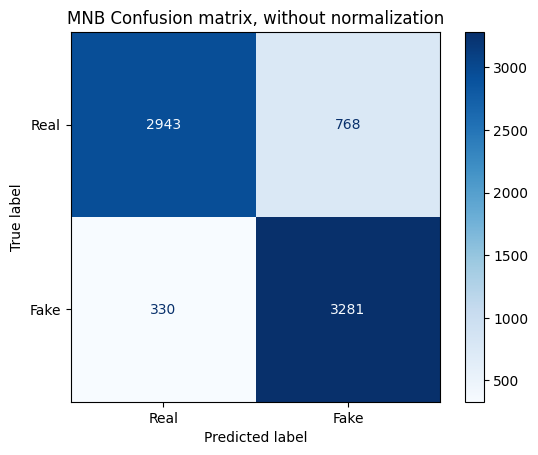

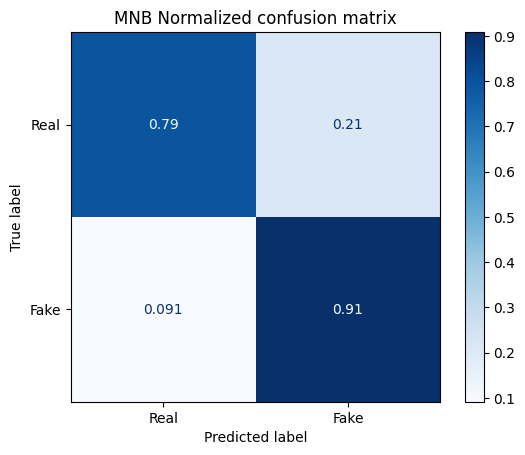

In [156]:
# Plot non-normalized confusion matrix
titles_options = [
    ("MNB Confusion matrix, without normalization", None),
    ("MNB Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        Xts,
        yts,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [157]:
#1) Multinomial Naive Bayes
#MNB F1 score improved from 0.41 to 0.86

# print("Cross Val: ", cross_val_score(MNB, X, y, cv=3))
print("Accuracy: ",metrics.accuracy_score(yts, yhat))
print("Precision: ", metrics.precision_score(yts, yhat))
print("Recall: ", metrics.recall_score(yts, yhat))
print("F1: ", metrics.f1_score(yts, yhat))
print("ROC-AUC: ", metrics.roc_auc_score(yts, yhat))

Accuracy:  0.8500409724119093
Precision:  0.8103235366757224
Recall:  0.9086125726945444
F1:  0.8566579634464752
ROC-AUC:  0.850830134366674


BNB Confusion matrix, without normalization
[[2943  768]
 [ 330 3281]]
BNB Normalized confusion matrix
[[0.7930477  0.2069523 ]
 [0.09138743 0.90861257]]


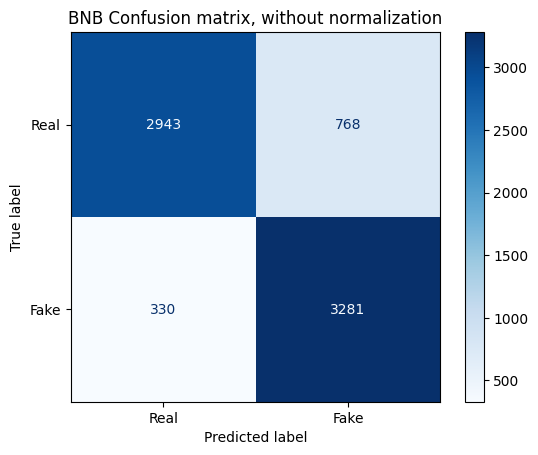

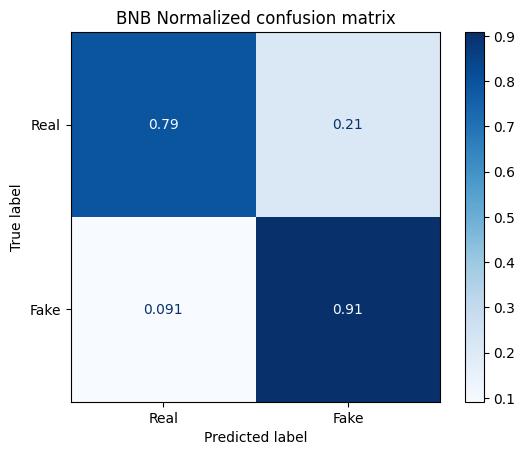

In [158]:
#2) Bernoulli Naive Bayes
BNB = BernoulliNB()
BNB.fit(Xtr,ytr)
yhat= BNB.predict(Xts)

# Plot non-normalized confusion matrix
titles_options = [
    ("BNB Confusion matrix, without normalization", None),
    ("BNB Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        Xts,
        yts,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [159]:
#BNB Performance
print("Cross Val : ", cross_val_score(BNB, X, y, cv=10))
print("Accuracy: ",metrics.accuracy_score(yts, yhat))
print("Precision: ", metrics.precision_score(yts, yhat))
print("Recall: ", metrics.recall_score(yts, yhat))
print("F1: ", metrics.f1_score(yts, yhat))
print("ROC-AUC: ", metrics.roc_auc_score(yts, yhat))

Cross Val :  [0.8387931  0.83232759 0.83103448 0.83663793 0.83275862 0.82672414
 0.82880552 0.82147477 0.83139284 0.83699871]
Accuracy:  0.8721660748429391
Precision:  0.8556235043871311
Recall:  0.8911658820271393
F1:  0.8730330982094411
ROC-AUC:  0.8724220679335374


Logistic Regression

In [160]:
#Logistic Regression - before SMOTE 0.83, after SMOTE 0.86
LR_Model = LogisticRegression()
LR_Model.fit(Xtr, ytr)
yhat = LR_Model.predict(Xts)

print("Accuracy: ",metrics.accuracy_score(yts, yhat))
print("Precision: ", metrics.precision_score(yts, yhat))
print("Recall: ", metrics.recall_score(yts, yhat))
print("F1: ", metrics.f1_score(yts, yhat))
print("ROC-AUC: ", metrics.roc_auc_score(yts, yhat))

Accuracy:  0.8453974323955203
Precision:  0.8540417023707512
Recall:  0.8280254777070064
F1:  0.8408323959505062
ROC-AUC:  0.8451633721059958


XGBoost

In [161]:
#XGBoost - before SMOTE 0.80, after SMOTE 0.79
xgb = XGBClassifier()
model = xgb.fit(Xtr, ytr)
yhat = xgb.predict(Xts)

print("Accuracy: ",metrics.accuracy_score(yts, yhat))
print("Precision: ", metrics.precision_score(yts, yhat))
print("Recall: ", metrics.recall_score(yts, yhat))
print("F1: ", metrics.f1_score(yts, yhat))
print("ROC-AUC: ", metrics.roc_auc_score(yts, yhat))

Accuracy:  0.8426659382682328
Precision:  0.9043077934889839
Recall:  0.7615618942121296
F1:  0.8268190018039687
ROC-AUC:  0.8415731863946663


## Apply Undersampling & SMOTE (Synthetic Minority Over Sampling)
• Undersample majority class (REAL news) <br>
• Over sample minority class (FAKE news)

In [162]:
#Dataset Preparation
#Undersample Real News & Oversample Fake News


In [163]:
#Data Shape
fakenews.shape

(5755, 3)

In [164]:
undersample_realnews.shape

(11510, 3)

In [165]:
news_df = np.concatenate((fakenews, undersample_realnews))

In [166]:
# Assign columns
news_df = pd.DataFrame(allnews, columns = ['id','title','flag'])
news_df.head(5)

,id,title,flag
10360,gossipcop-953416,Downton Abbey (film),0.0
16132,gossipcop-900066,"Actors, directors tackle what Disney/Fox deal ...",0.0
12144,gossipcop-914133,McDonald's Is Testing Breakfast Happy Meals,0.0
20237,gossipcop-903315,See All the Photos of Pregnant Jinger Duggar's...,0.0
18843,gossipcop-938189,Suri Cruise Just Wore Summer’s New Floral Dres...,0.0


In [167]:
# TF-IDF Vectorizer
# Transform texts (news titles) into a meaningful representation of numbers while removing stopwords
tf_idf = TfidfVectorizer(analyzer='word', stop_words='english', strip_accents = "ascii")
X = tf_idf.fit_transform(news_df['title'])
y = allnews['flag'].astype('int')

#Transform to arrays
np.asarray(X)
np.asarray(y)

# #70:30 Train and Test Split
# Xtr, Xts, ytr, yts = train_test_split(X, y, random_state = 0, test_size = 0.3)

array([0, 0, 0, ..., 1, 0, 1])

In [168]:
#Apply SMOTE on Minority Class
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [169]:
#Count # Classes
ctr = Counter(y_res)
print(ctr)

Counter({0: 17441, 1: 17441})


In [170]:
#To Array and Train-Test Split
np.asarray(X_res)
np.asarray(y_res)
Xtr, Xts, ytr, yts = train_test_split(X_res, y_res, random_state = 0, test_size = 0.3)

In [171]:
#1) Multinomial Naive Bayes
MNB = MultinomialNB()
classifier = MNB.fit(Xtr,ytr)
yhat = MNB.predict(Xts)

MNB Confusion matrix, without normalization
[[4071 1080]
 [ 548 4766]]
MNB Normalized confusion matrix
[[0.79033197 0.20966803]
 [0.10312382 0.89687618]]


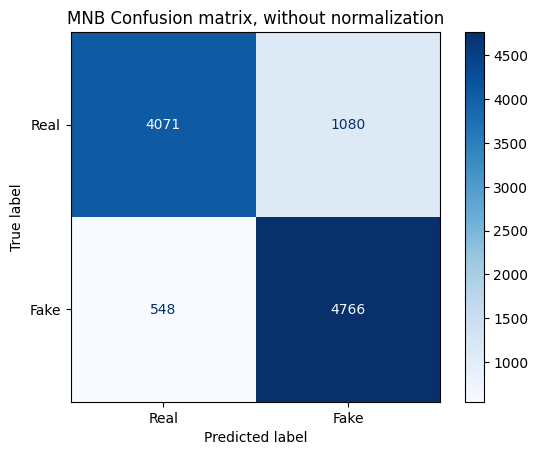

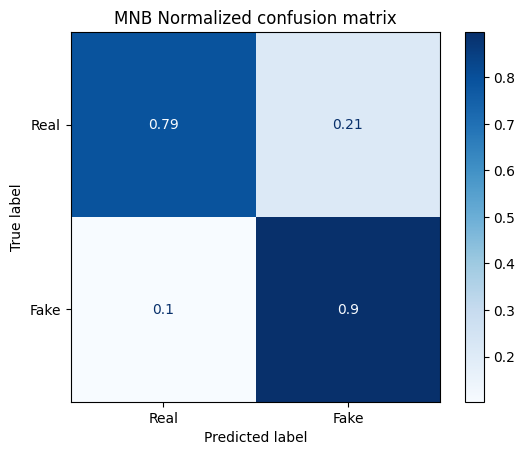

In [172]:
#0- real news, 1- fake news
class_names = ['Real','Fake']

# Plot non-normalized confusion matrix
titles_options = [
    ("MNB Confusion matrix, without normalization", None),
    ("MNB Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        Xts,
        yts,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [173]:
#1) Multinomial Naive Bayes
#MNB F1 score improved from 0.41 to 0.86

# print("Cross Val: ", cross_val_score(MNB, X, y, cv=3))
print("Accuracy: ",metrics.accuracy_score(yts, yhat))
print("Precision: ", metrics.precision_score(yts, yhat))
print("Recall: ", metrics.recall_score(yts, yhat))
print("F1: ", metrics.f1_score(yts, yhat))
print("ROC-AUC: ", metrics.roc_auc_score(yts, yhat))

Accuracy:  0.8444338270425227
Precision:  0.8152582962709545
Recall:  0.8968761761385021
F1:  0.854121863799283
ROC-AUC:  0.8436040752562052


BNB Confusion matrix, without normalization
[[4071 1080]
 [ 548 4766]]
BNB Normalized confusion matrix
[[0.79033197 0.20966803]
 [0.10312382 0.89687618]]


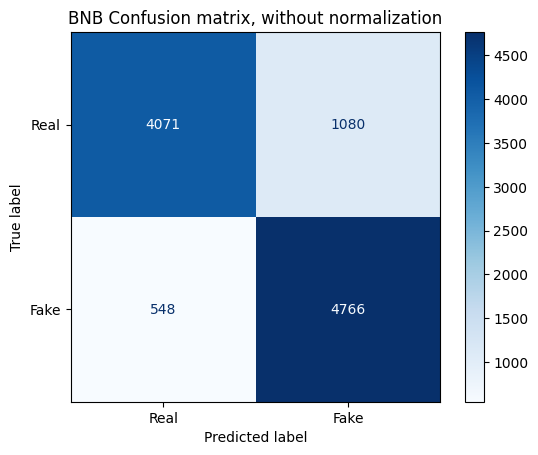

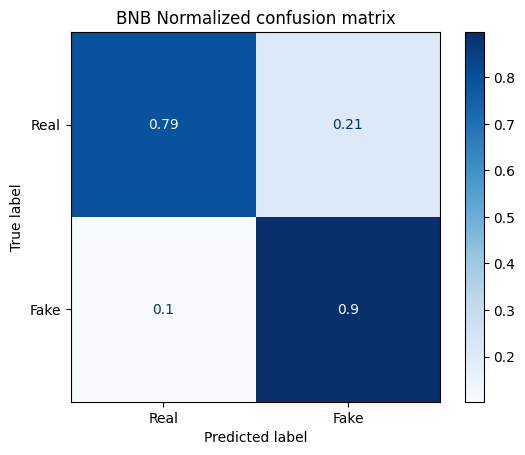

In [174]:
#2) Bernoulli Naive Bayes
BNB = BernoulliNB()
BNB.fit(Xtr,ytr)
yhat= BNB.predict(Xts)

# Plot non-normalized confusion matrix
titles_options = [
    ("BNB Confusion matrix, without normalization", None),
    ("BNB Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        Xts,
        yts,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [177]:
#2) Bernoulli Naive Bayes

# print("Cross Val: ", cross_val_score(MNB, X, y, cv=3))
print("Accuracy: ",metrics.accuracy_score(yts, yhat))
print("Precision: ", metrics.precision_score(yts, yhat))
print("Recall: ", metrics.recall_score(yts, yhat))
print("F1: ", metrics.f1_score(yts, yhat))
print("ROC-AUC: ", metrics.roc_auc_score(yts, yhat))

Accuracy:  0.8615384615384616
Precision:  0.8466367713004485
Recall:  0.8882197967632668
F1:  0.8669299292864358
ROC-AUC:  0.8611163049046386


In [178]:
#Logistic Regression - before SMOTE 0.83, after SMOTE 0.86
LR_Model = LogisticRegression()
LR_Model.fit(Xtr, ytr)
yhat = LR_Model.predict(Xts)

print("Accuracy: ",metrics.accuracy_score(yts, yhat))
print("Precision: ", metrics.precision_score(yts, yhat))
print("Recall: ", metrics.recall_score(yts, yhat))
print("F1: ", metrics.f1_score(yts, yhat))
print("ROC-AUC: ", metrics.roc_auc_score(yts, yhat))

Accuracy:  0.8406115623506928
Precision:  0.8484327217125383
Recall:  0.8353406097101995
F1:  0.8418357671154941
ROC-AUC:  0.8406949602618169


In [179]:
#XGBoost - before SMOTE 0.80, after SMOTE 0.79
xgb = XGBClassifier()
model = xgb.fit(Xtr, ytr)
yhat = xgb.predict(Xts)

print("Accuracy: ",metrics.accuracy_score(yts, yhat))
print("Precision: ", metrics.precision_score(yts, yhat))
print("Recall: ", metrics.recall_score(yts, yhat))
print("F1: ", metrics.f1_score(yts, yhat))
print("ROC-AUC: ", metrics.roc_auc_score(yts, yhat))

Accuracy:  0.8380315336837076
Precision:  0.9039964277740568
Recall:  0.7619495671810312
F1:  0.8269171857449199
ROC-AUC:  0.8392353155260621


In [180]:
# from sklearn import svm - SVM takes a long time

In [181]:
# svm = svm.SVC()
# svm.fit(X, y)
# yhat= svm.predict(X)

In [182]:
#Print socres
# print("Cross Val: ", cross_val_score(svm, X, y, cv=3))
# print("Accuracy: ",metrics.accuracy_score(y, yhat))
# print("Precision: ", metrics.precision_score(y, yhat))
# print("Recall: ", metrics.recall_score(y, yhat))
# print("F1: ", metrics.f1_score(y, yhat))
# print("AUC: ", metrics.roc_auc_score(y, yhat))